# Global Energy Balance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Problem Statement 

The Sun emits thermal radiation, a fraction of solar radiation is absorbed by the Earth and the rest is reflected into space, the Earth emits thermal radiation like a black body and some fraction of that thermal energy is absorbed by the atmosphere. Construct a mathematical model of the temperature of the Earth over time.

:::{seealso}
Check out [Mathematics and Climate > Chapter 2: Earth's Energy Budget](https://epubs.siam.org/doi/10.1137/1.9781611972610) for more about climate models.
:::

## Variables and Parameters


| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| temperature of the Earth and atmosphere | $T$ | $\Theta$ | dependent variable |
| time | $t$ | T | independent variable |
| solar constant | $S_0$ | M T<sup>-3</sup> | parameter |
| albedo of the Earth | $\alpha$ | 1 | parameter |
| radius of the Earth | $R$ | L | parameter |
| Stefan-Boltzmann constant | $\sigma$ | M T<sup>-3</sup> $\Theta^{-4}$ | parameter |
| heat capacity of the Earth and atmosphere | $C$ | M L<sup>2</sup> T<sup>-2</sup> $\Theta^{-1}$ | parameter |
| greenhouse parameter | $\varepsilon$ | 1 | parameter |

## Assumptions and Constraints

* The Earth and the atmosphere form one object with homogeneous temperature $T$ and heat capacity $C$
* $S_0$ is constant
* Earth emits radiation as a black body $\sigma T^4$
* $\alpha$ is constant
* $C$ is constant
* $\varepsilon$ is constant

## Construction

The rate of energy absorbed by the Earth is $Q_{in} = (1 - \alpha) \pi R^2 S_0$ and the rate of energy emitted by the Earth is $Q_{out} = 4 \pi R^2 \sigma \varepsilon T^4$. The energy balance equation yields

$$
C \frac{dT}{dt} = (1 - \alpha) \pi R^2 S_0 - 4 \pi R^2 \sigma \varepsilon T^4
$$

Apply the nondimensionalization procedure. Let $t = [t] t^*$ and $T = [T] T^*$ and make the subtitution

$$
C \frac{[T]}{[t]} \frac{dT^*}{dt^*} = (1 - \alpha) \pi R^2 S_0 - 4 \pi R^2 \sigma \varepsilon [T]^4 T^4
$$

Divide by the coefficient in $T^4$ term

$$
\frac{C}{4 \pi R^2 \sigma \varepsilon [T]^3[t]} \frac{dT^*}{dt^*} = \frac{(1 - \alpha)S_0}{4 \sigma \varepsilon  [T]^4} - T^{*4}
$$

Choose values for scaling factors $[t]$ and $[T]$ to make coefficients equal to 1:

$$
[T] = \left( \frac{(1 - \alpha) S_0}{4 \sigma \varepsilon} \right)^{1/4}
\hspace{10mm}
[t] = \frac{C}{4 \pi R^2 \sigma \varepsilon [T]^3} = \frac{C}{4 \pi R^2 \sigma \varepsilon} \left( \frac{4 \sigma \varepsilon}{(1 - \alpha) S_0} \right)^{3/4}
$$

Rewrite the system:

$$
\frac{dT^*}{dt^*} = 1 - T^{*4} \ , \ \ T^*(0) = \frac{T_0}{[T]}
$$

## Analysis

Since $T>0$, there is only one steady state solution

$$
T^*_{\infty} = 1
\hspace{10mm}
T_{\infty} = \left( \frac{(1 - \alpha) S_0}{4 \sigma \varepsilon} \right)^{1/4}
$$

The steady state depends only on the solar constant $S_0$, albedo $\alpha$, Stefan-Boltzmann constant $\sigma$ and greenhouse parameter $\varepsilon $. The parameters $C$ and $R$ only change the time scale $[t]$.

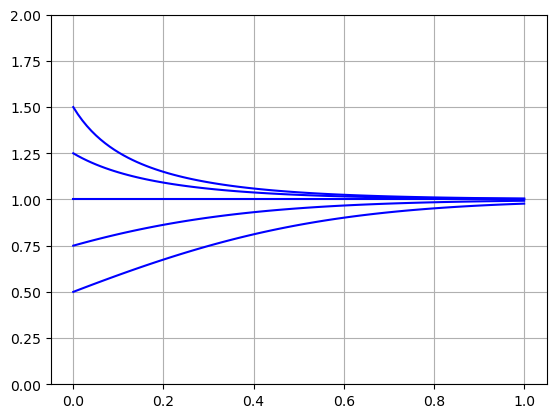

In [3]:
f = lambda T,t: 1 - T**4
t = np.linspace(0,1,100)

for T0 in [0.5,0.75,1.0,1.25,1.5]:
    T = spi.odeint(f,T0,t)
    plt.plot(t,T,'b')

plt.ylim([0,2]),plt.grid(True)
plt.show()